In [14]:
import numpy as np
import matplotlib.pyplot as plt
from memfunctions.mem import kernel_calculation, solve_MEM, solve_Tik, \
    solve_noreg, A2pdf
from memfunctions.plotting import plot_MEM, plot_Tik, plot_noreg

First, we create some sample data - a simple biexponential model function.

In [15]:
tau = (1,4) # lifetime of 1 and 4 ns
amp = (0.5, 0.5) # equal weight
I0 = 1E3 # number of photons
t = np.linspace(0,20,1000) # time axis
model = np.zeros(t.shape)
for i in range(len(tau)):
    model += amp[i]*np.exp(-t/tau[i])
model *= I0
# add noise
model = np.random.poisson(model)
# convolute with Gaussian instrument response function


Define the kernel function:

In [16]:
def kernel_function(x,tau):
    a = np.exp(-x/tau)
    return a/np.sum(a)

Do the MEM analyis:

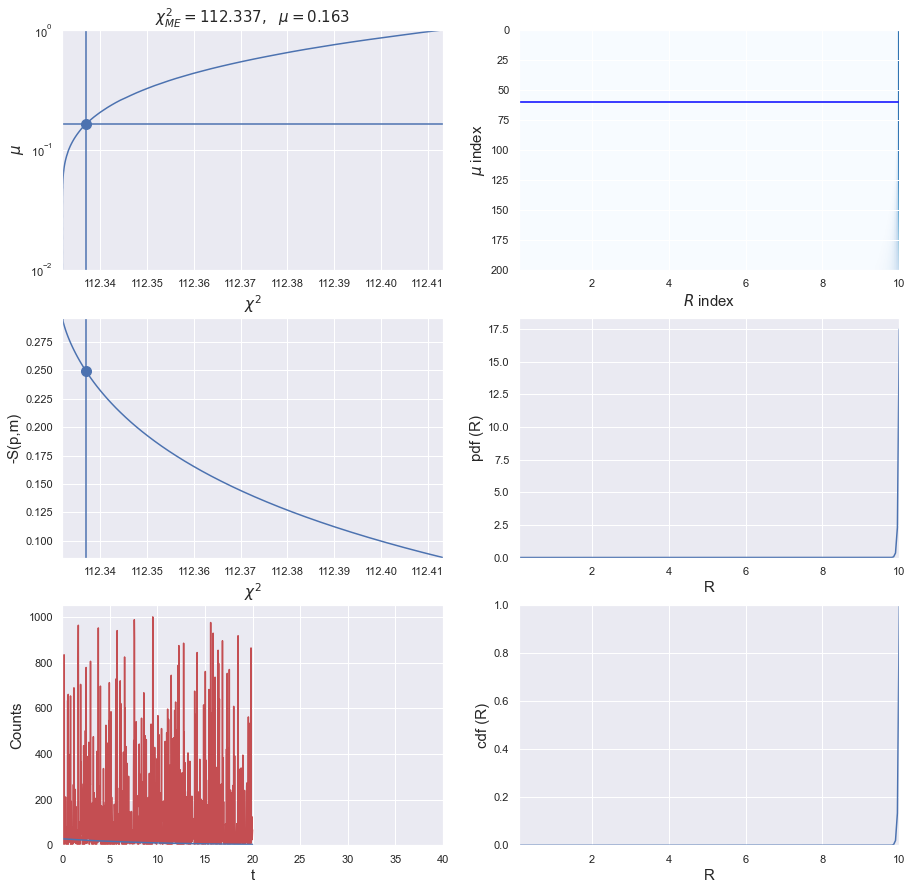

In [17]:
param_range = np.linspace(0.1,10,200)
# precalculations
F_R, param_range, mParam, c, q, H = kernel_calculation(t, model, lambda x : kernel_function(t,x), param_range)
p, muRange, chiRange, SRange = solve_MEM(c,q,H,mParam)
result = A2pdf(p,mParam,param_range)
plot_MEM(60,t,model,param_range,mParam,p,F_R,chiRange,muRange,SRange)